<a href="https://colab.research.google.com/github/PauloGuz/Cuadernos-/blob/main/Parcial_1_Se%C3%B1ales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

b). Cual es la senal obtenida en tiempo discreto al utilizar un ˜
conversor analogo digital con frecuencia de muestreo de ´
5kHz, aplicado a la senal continua ˜ x(t) = 3 cos(1000πt) +
5 sin(2000πt) + 10 cos(11000πt)?. Realizar la simulacion´
del proceso de discretizacion.

<ipython-input-15-554913e7fb3d>:21: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(t_muestreo, valores_muestreados, label='Señal muestreada', use_line_collection=True)


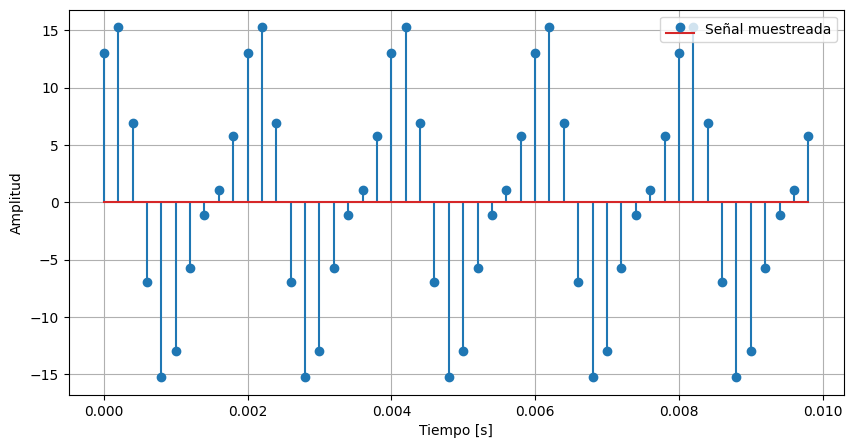

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la señal continua
def x(t):
    return 3 * np.cos(1000 * np.pi * t) + 5 * np.sin(2000 * np.pi * t) + 10 * np.cos(11000 * np.pi * t)

# Definir el rango de tiempo continuo
t_continuo = np.linspace(0, 0.01, 1000)  # Duración de 0.01 segundos

# Muestrear la señal continua a una frecuencia de muestreo de 5 kHz
frecuencia_muestreo = 5000  # Hz
t_muestreo = np.arange(0, 0.01, 1 / frecuencia_muestreo)

# Obtener los valores muestreados de la señal continua
valores_muestreados = x(t_muestreo)

# Plotear la señal continua y la señal muestreada
plt.figure(figsize=(10, 5))
#plt.plot(t_continuo, x(t_continuo), label='Señal continua')
plt.stem(t_muestreo, valores_muestreados, label='Señal muestreada', use_line_collection=True)
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
#plt.title('Muestreo de la señal continua')
plt.legend()
plt.grid(True)
plt.show()


c). Implemente una simulacion para encontrar la salida del sis- ´
tema lineal e invariante al tiempo H{·}, con respuesta al
escalon´ hϵ[n] = {2, 4, 1, 5, 0, 10}, n ∈ Z, ante la entrada
analoga en corriente ´ x(t) = 20(cos(t/3) + cos(t/4)) [A].
A: Amperios. Incluya los acondicionamientos necesarios de
discretizacion y cuantizaci ´ on, asumiendo un microprocesa- ´
dor de 4 bits con entrada analoga de 4mA a 20mA.

In [16]:
#función cero y pendiente
def my_ceropend(x,xhmax=10,xhmin=0):
  #cálculo de pendiente y cero
  m = (xhmax-xhmin)/(x.max()-x.min())
  b = xhmin - m*x.min()
  xh = m*x+b
  return xh

Discretización y cuantización

<ipython-input-17-8b49d3327bd6>:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  xq[i] = ve[np.argmin(cdist(xh[i].reshape(-1,1),ve))] #se cálcula la distancia desde cada punto al vector de estados


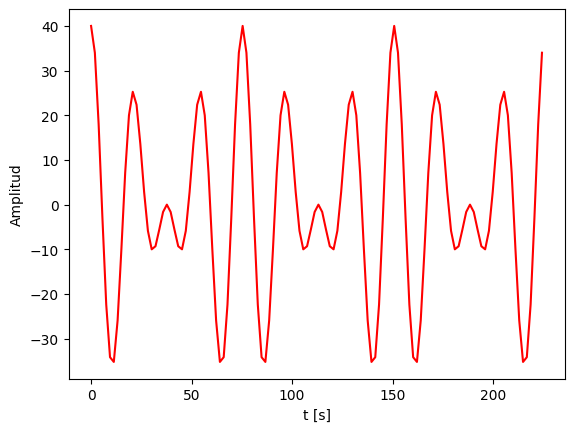

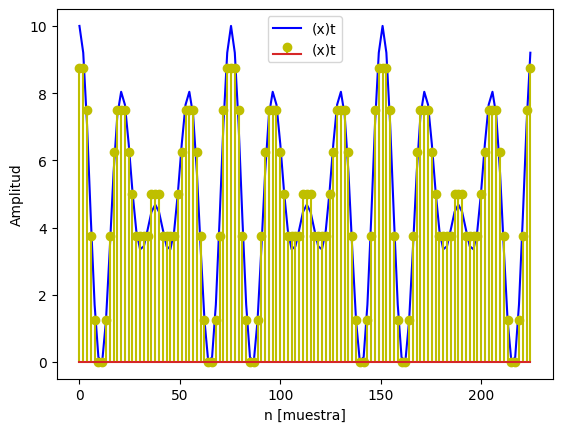

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

T1 = 6*np.pi #perido señal 1
T2 = 8*np.pi #perido señal 2
F1 = 1/T1
F2 = 1/T2
T = 24*np.pi #perido cuasiperiódica
Fs = 10*max(F1,F2) #frecuencia muestreo
t = np.arange(0,3*T,1/Fs) #vector de tiempo, se muestran 3 periodos
x = 20*(np.cos(t/3)+np.cos(t/4))
xhmax = 10
xhmin = 0
xh = my_ceropend(x,xhmax, xhmin).reshape(-1,1)#aplicar cero y pendiente de 0 a 10
#asegurar vector columna

#cuantizar
nbits = 3 #número bits
Ne = 2**nbits #cantidad de estados
res = (xhmax-xhmin)/Ne #resolución cuantización
ve = np.arange(xhmin,xhmax,res).reshape(-1,1)#vector de estados
#asegurar vector columna

xq = np.zeros(len(xh)) #señal cuantizada
for i in range(len(xh)): #recorrer señal cero y pendiente
    xq[i] = ve[np.argmin(cdist(xh[i].reshape(-1,1),ve))] #se cálcula la distancia desde cada punto al vector de estados

#gráficas de señales
plt.plot(t,x,'r',label='(x)t')
plt.xlabel('t [s]')
plt.ylabel('Amplitud')
plt.show()
plt.plot(t,xh,'b',label='(x)t')
plt.stem(t,xq,'y',label='(x)t')
plt.xlabel('n [muestra]')
plt.ylabel('Amplitud')
plt.legend()
plt.show()

 Encontramos la salida del SLIT aplicando la convolución entre la entrada digital y la respuesta impulso

In [18]:
he = np.array([2,4,1,5,0,10]) #respuesta al escalón del slit
h = np.diff(he)#respuesta al impulso del slit
print(h)

[ 2 -3  4 -5 10]


Realizamos convolución

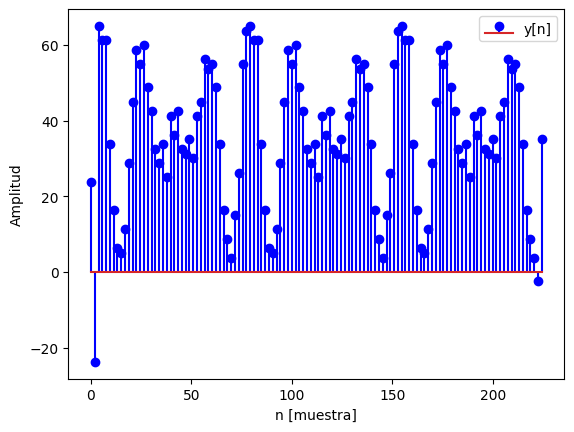

In [19]:
y = np.convolve(xq,h,mode='same')#respuesta del slit -> se asegura tamaños iguales con mode=same
#graficar señal
plt.stem(t,y,'b',label='y[n]')
plt.legend()
plt.xlabel('n [muestra]')
plt.ylabel('Amplitud')
plt.show()